# Multivariate Relationship Discovery System 


## Imports and Data Loading

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Reload modules to pick up changes without restarting kernel
import importlib
import sys

# Remove cached modules
modules_to_reload = [
    'lib.v1.visualizing',
    'lib.v1.visualizing.visualizer',
    'lib.v1.visualizing.excursion_visualizer',
    'lib.v1.detection',
    'lib.v1.detection.violation_detector',
]

for module in modules_to_reload:
    if module in sys.modules:
        del sys.modules[module]

# Now import
from lib.v1.visualizing import BoundaryVisualizer, ExcursionVisualizer
from lib.v1.detection import ViolationDetector


# Set plot style - NO BACKGROUND, clean appearance
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.framealpha'] = 0.9

sns.set_palette('husl')

print("Libraries imported successfully.")
print("Plot style configured: White background, larger legends")


Libraries imported successfully.
Plot style configured: White background, larger legends


In [ ]:
# Configuration for data loading
FAULT_NUMBER = 2
SIM_RUN = 1

print("="*80)
print("LOADING ALL EXPORTED DATA")
print("="*80)

# ============================================================================
# FULL DATASETS (All simulation runs and faults)
# ============================================================================
print("\n[1/2] Loading FULL datasets (all simulation runs)...")

# X data - Full datasets
X_INCONTROL_TRAIN_FULL = pd.read_csv(
    "data/exported_csv/X_INCONTROL_TRAIN_FULL_SCALED.csv"
).values

X_INCONTROL_TEST_FULL = pd.read_csv(
    "data/exported_csv/X_INCONTROL_TEST_FULL_SCALED.csv"
).values

X_OUT_OF_CONTROL_TRAIN_FULL = pd.read_csv(
    "data/exported_csv/X_OUT_OF_CONTROL_TRAIN_FULL_SCALED.csv"
).values

X_OUT_OF_CONTROL_TEST_FULL = pd.read_csv(
    "data/exported_csv/X_OUT_OF_CONTROL_TEST_FULL_SCALED.csv"
).values

# y data - Full datasets
y_INCONTROL_TRAIN_FULL = pd.read_csv(
    "data/exported_csv/y_INCONTROL_TRAIN_FULL.csv"
).values.flatten()

y_INCONTROL_TEST_FULL = pd.read_csv(
    "data/exported_csv/y_INCONTROL_TEST_FULL.csv"
).values.flatten()

y_OUT_OF_CONTROL_TRAIN_FULL = pd.read_csv(
    "data/exported_csv/y_OUT_OF_CONTROL_TRAIN_FULL.csv"
).values.flatten()

y_OUT_OF_CONTROL_TEST_FULL = pd.read_csv(
    "data/exported_csv/y_OUT_OF_CONTROL_TEST_FULL.csv"
).values.flatten()

print(f"Full datasets loaded successfully:")
print(f"  X_INCONTROL_TRAIN_FULL: {X_INCONTROL_TRAIN_FULL.shape}")
print(f"  X_INCONTROL_TEST_FULL: {X_INCONTROL_TEST_FULL.shape}")
print(f"  X_OUT_OF_CONTROL_TRAIN_FULL: {X_OUT_OF_CONTROL_TRAIN_FULL.shape}")
print(f"  X_OUT_OF_CONTROL_TEST_FULL: {X_OUT_OF_CONTROL_TEST_FULL.shape}")
print(f"  y_INCONTROL_TRAIN_FULL: {y_INCONTROL_TRAIN_FULL.shape}")
print(f"  y_INCONTROL_TEST_FULL: {y_INCONTROL_TEST_FULL.shape}")
print(f"  y_OUT_OF_CONTROL_TRAIN_FULL: {y_OUT_OF_CONTROL_TRAIN_FULL.shape}")
print(f"  y_OUT_OF_CONTROL_TEST_FULL: {y_OUT_OF_CONTROL_TEST_FULL.shape}")

# ============================================================================
# SELECTED DATASETS (Specific fault number and simulation run)
# ============================================================================
# print(f"\n[2/2] Loading SELECTED datasets (Fault {FAULT_NUMBER}, Simulation {SIM_RUN})...")

# # X data - Selected datasets
# X_INCONTROL_TRAIN = pd.read_csv(
#     f"data/exported_csv/X_INCONTROL_TRAIN_SELECTED_SCALED_fault_{FAULT_NUMBER}_sim_{SIM_RUN}.csv"
# ).values

# X_INCONTROL_TEST = pd.read_csv(
#     f"data/exported_csv/X_INCONTROL_TEST_SELECTED_SCALED_fault_{FAULT_NUMBER}_sim_{SIM_RUN}.csv"
# ).values

# X_OUT_OF_CONTROL_TRAIN = pd.read_csv(
#     f"data/exported_csv/X_OUT_OF_CONTROL_TRAIN_SELECTED_SCALED_fault_{FAULT_NUMBER}_sim_{SIM_RUN}.csv"
# ).values

# X_OUT_OF_CONTROL_TEST = pd.read_csv(
#     f"data/exported_csv/X_OUT_OF_CONTROL_TEST_SELECTED_SCALED_fault_{FAULT_NUMBER}_sim_{SIM_RUN}.csv"
# ).values

# # y data - Selected datasets
# y_INCONTROL_TRAIN = pd.read_csv(
#     f"data/exported_csv/y_INCONTROL_TRAIN_SELECTED_fault_{FAULT_NUMBER}_sim_{SIM_RUN}.csv"
# ).values.flatten()

# y_INCONTROL_TEST = pd.read_csv(
#     f"data/exported_csv/y_INCONTROL_TEST_SELECTED_fault_{FAULT_NUMBER}_sim_{SIM_RUN}.csv"
# ).values.flatten()

# y_OUT_OF_CONTROL_TRAIN = pd.read_csv(
#     f"data/exported_csv/y_OUT_OF_CONTROL_TRAIN_SELECTED_fault_{FAULT_NUMBER}_sim_{SIM_RUN}.csv"
# ).values.flatten()

# y_OUT_OF_CONTROL_TEST = pd.read_csv(
#     f"data/exported_csv/y_OUT_OF_CONTROL_TEST_SELECTED_fault_{FAULT_NUMBER}_sim_{SIM_RUN}.csv"
# ).values.flatten()

# print(f"Selected datasets loaded successfully:")
# print(f"  X_INCONTROL_TRAIN: {X_INCONTROL_TRAIN.shape}")
# print(f"  X_INCONTROL_TEST: {X_INCONTROL_TEST.shape}")
# print(f"  X_OUT_OF_CONTROL_TRAIN: {X_OUT_OF_CONTROL_TRAIN.shape}")
# print(f"  X_OUT_OF_CONTROL_TEST: {X_OUT_OF_CONTROL_TEST.shape}")
# print(f"  y_INCONTROL_TRAIN: {y_INCONTROL_TRAIN.shape}")
# print(f"  y_INCONTROL_TEST: {y_INCONTROL_TEST.shape}")
# print(f"  y_OUT_OF_CONTROL_TRAIN: {y_OUT_OF_CONTROL_TRAIN.shape}")
# print(f"  y_OUT_OF_CONTROL_TEST: {y_OUT_OF_CONTROL_TEST.shape}")

# # ============================================================================
# # SUMMARY
# # ============================================================================
# print("\n" + "="*80)
# print("DATA LOADING SUMMARY")
# print("="*80)
# print(f"\nDatasets available:")
# print(f"  FULL: All simulation runs and faults combined")
# print(f"    - Use for training models across all operating conditions")
# print(f"    - Fault labels (y) range from 0 (fault-free) to 1-20 (different faults)")
# print(f"\n  SELECTED: Single fault (#{FAULT_NUMBER}) and simulation run (#{SIM_RUN})")
# print(f"    - Use for focused analysis on specific fault type")
# print(f"    - Currently configured for this research notebook")
# print(f"\nAll features (X) are SCALED using StandardScaler from in-control training data")
# print(f"Number of features: {X_INCONTROL_TRAIN.shape[1]}")
# print("="*80)

LOADING ALL EXPORTED DATA

[1/2] Loading FULL datasets (all simulation runs)...
Full datasets loaded successfully:
  X_INCONTROL_TRAIN_FULL: (250000, 52)
  X_INCONTROL_TEST_FULL: (9600000, 52)
  X_OUT_OF_CONTROL_TRAIN_FULL: (5000000, 52)
  X_OUT_OF_CONTROL_TEST_FULL: (9600000, 52)
  y_INCONTROL_TRAIN_FULL: (250000,)
  y_INCONTROL_TEST_FULL: (480000,)
  y_OUT_OF_CONTROL_TRAIN_FULL: (5000000,)
  y_OUT_OF_CONTROL_TEST_FULL: (9600000,)

[2/2] Loading SELECTED datasets (Fault 2, Simulation 1)...
Selected datasets loaded successfully:
  X_INCONTROL_TRAIN: (500, 52)
  X_INCONTROL_TEST: (960, 52)
  X_OUT_OF_CONTROL_TRAIN: (500, 52)
  X_OUT_OF_CONTROL_TEST: (960, 52)
  y_INCONTROL_TRAIN: (500,)
  y_INCONTROL_TEST: (960,)
  y_OUT_OF_CONTROL_TRAIN: (500,)
  y_OUT_OF_CONTROL_TEST: (960,)

DATA LOADING SUMMARY

Datasets available:
  FULL: All simulation runs and faults combined
    - Use for training models across all operating conditions
    - Fault labels (y) range from 0 (fault-free) to 1-20 (di

## Configuration

In [21]:
@dataclass
class BoundaryConfig:
    """Configuration for quantile-based boundary calculation with multiple boundaries per level"""
    
    # Number of boundaries per sensitivity level (supports multimodal distributions)
    n_boundaries_sensitive: int = 3  # Number of boundary regions for sensitive level
    n_boundaries_medium: int = 3     # Number of boundary regions for medium level
    n_boundaries_large: int = 3      # Number of boundary regions for large level
    
    # Boundary quantiles (percentage of data range for each boundary width)
    sensitive_quantile: float = 0.25  # Narrow boundaries (25th percentile)
    medium_quantile: float = 0.40     # Medium boundaries (40th percentile)
    large_quantile: float = 0.90      # Wide boundaries (60th percentile)
    
    # Clustering method for finding boundary locations
    # Options: 'kmeans', 'histogram_peaks', 'quantile_positions'
    clustering_method: str = 'kmeans'
    
    # Variable names
    variable_names: List[str] = field(default_factory=lambda: 
        [f'xmeas_{i}' for i in range(1, 42)] + [f'xmv_{i}' for i in range(1, 12)]
    )
    
    # Time lag parameters (for future phases)
    min_lag: int = 0
    max_lag: int = 10
    
    # User adjustments (location offsets for each variable and level)
    location_adjustments: Dict[Tuple[int, str], float] = field(default_factory=dict)
    width_adjustments: Dict[Tuple[int, str], float] = field(default_factory=dict)
    
    @property
    def sensitivity_levels(self) -> Dict[str, float]:
        """Return sensitivity levels as dictionary"""
        return {
            'Sensitive': self.sensitive_quantile,
            'Medium': self.medium_quantile,
            'Large': self.large_quantile
        }
    
    def get_n_boundaries(self, level: str) -> int:
        """Get number of boundaries for a sensitivity level"""
        n_boundaries_map = {
            'Sensitive': self.n_boundaries_sensitive,
            'Medium': self.n_boundaries_medium,
            'Large': self.n_boundaries_large
        }
        return n_boundaries_map[level]
    
    def get_adjusted_quantile(self, var_idx: int, level: str) -> float:
        """Get quantile with user adjustments applied"""
        base_quantile = self.sensitivity_levels[level]
        adjustment = self.width_adjustments.get((var_idx, level), 0.0)
        return np.clip(base_quantile + adjustment, 0.01, 0.99)
    
    def get_adjusted_location(self, var_idx: int, level: str, default_location: float) -> float:
        """Get location with user adjustments applied"""
        adjustment = self.location_adjustments.get((var_idx, level), 0.0)
        return default_location + adjustment
    
    def set_quantile_adjustment(self, var_idx: int, level: str, adjustment: float):
        """Set quantile adjustment for a variable and level"""
        self.width_adjustments[(var_idx, level)] = adjustment
    
    def set_location_adjustment(self, var_idx: int, level: str, adjustment: float):
        """Set location adjustment for a variable and level"""
        self.location_adjustments[(var_idx, level)] = adjustment

# Initialize configuration
config = BoundaryConfig()

print("Configuration initialized:")
print(f"  Sensitivity levels (quantiles): {config.sensitivity_levels}")
print(f"  Number of boundaries per level:")
print(f"    Sensitive: {config.n_boundaries_sensitive}")
print(f"    Medium: {config.n_boundaries_medium}")
print(f"    Large: {config.n_boundaries_large}")
print(f"  Clustering method: {config.clustering_method}")
print(f"  Number of variables: {len(config.variable_names)}")

Configuration initialized:
  Sensitivity levels (quantiles): {'Sensitive': 0.25, 'Medium': 0.4, 'Large': 0.9}
  Number of boundaries per level:
    Sensitive: 3
    Medium: 3
    Large: 3
  Clustering method: kmeans
  Number of variables: 52


## Phase 1: Define Normal Operating Boundaries and Boundaries visualizing

In [22]:
from sklearn.cluster import KMeans
from scipy.signal import find_peaks

class QuantileBoundaryCalculator:
    """
    Calculate multiple boundaries per sensitivity level based on data clustering.
    
    Each sensitivity level can have N boundary regions to handle multimodal 
    distributions or multiple operating regimes.
    """
    
    def __init__(self, config: BoundaryConfig):
        self.config = config
        self.data_stats = {}      # Store statistical info for each variable
        self.boundaries = {}      # Store calculated boundaries (now list of N boundaries)
        self.cluster_info = {}    # Store clustering information
        
    def _find_cluster_centers_kmeans(self, var_data: np.ndarray, n_clusters: int) -> np.ndarray:
        """
        Find cluster centers using K-means clustering.
        Best for detecting natural clusters in the data.
        
        Args:
            var_data: Variable data array
            n_clusters: Number of clusters to find
            
        Returns:
            Array of cluster centers sorted by value
        """
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(var_data.reshape(-1, 1))
        centers = kmeans.cluster_centers_.flatten()
        return np.sort(centers)
    
    def _find_cluster_centers_histogram_peaks(self, var_data: np.ndarray, n_clusters: int) -> np.ndarray:
        """
        Find cluster centers by detecting peaks in histogram.
        Best for multimodal distributions with clear peaks.
        
        Args:
            var_data: Variable data array
            n_clusters: Number of clusters to find
            
        Returns:
            Array of peak locations sorted by value
        """
        # Create histogram
        hist, bin_edges = np.histogram(var_data, bins=50)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Find peaks
        peaks, properties = find_peaks(hist, height=0)
        
        if len(peaks) >= n_clusters:
            # Sort by peak height and take top N
            peak_heights = properties['peak_heights']
            top_peak_indices = np.argsort(peak_heights)[-n_clusters:]
            centers = bin_centers[peaks[top_peak_indices]]
        else:
            # Not enough peaks, fall back to quantile positions
            centers = self._find_cluster_centers_quantile_positions(var_data, n_clusters)
        
        return np.sort(centers)
    
    def _find_cluster_centers_quantile_positions(self, var_data: np.ndarray, n_clusters: int) -> np.ndarray:
        """
        Find cluster centers at evenly spaced quantile positions.
        Simple method that always works, good for uniform exploration.
        
        Args:
            var_data: Variable data array
            n_clusters: Number of clusters to find
            
        Returns:
            Array of quantile-based centers sorted by value
        """
        # Create evenly spaced quantiles (excluding 0 and 1)
        positions = np.linspace(0, 1, n_clusters + 2)[1:-1]
        centers = np.quantile(var_data, positions)
        return np.sort(centers)
    
    def _find_cluster_centers(self, var_data: np.ndarray, n_clusters: int, method: str) -> np.ndarray:
        """
        Find N cluster centers using specified method.
        
        Args:
            var_data: Variable data array
            n_clusters: Number of clusters to find
            method: 'kmeans', 'histogram_peaks', or 'quantile_positions'
            
        Returns:
            Array of cluster centers sorted by value
        """
        if method == 'kmeans':
            return self._find_cluster_centers_kmeans(var_data, n_clusters)
        elif method == 'histogram_peaks':
            return self._find_cluster_centers_histogram_peaks(var_data, n_clusters)
        elif method == 'quantile_positions':
            return self._find_cluster_centers_quantile_positions(var_data, n_clusters)
        else:
            raise ValueError(f"Unknown clustering method: {method}")
    
    def _calculate_sensitive_boundaries(self, var_data: np.ndarray, var_idx: int) -> List[Dict[str, float]]:
        """
        Calculate SENSITIVE (narrow) boundaries using 25th percentile.
        Returns N boundary regions for multimodal distributions.
        
        This captures subtle variations and early warning signals.
        
        TODO: Future enhancement - Add dynamic boundary calculation logic here:
        - Implement time-dependent boundary adjustment (e.g., based on current timestamp)
        - Add smoothing functions (moving average, exponential smoothing, etc.)
        - Support adaptive boundaries based on recent process behavior
        - Consider seasonal or cyclical patterns in boundary adjustment
        - Experiment with different boundary widths per cluster based on local density
        - Add logic to merge/split boundaries dynamically based on data drift
        
        Args:
            var_data: Variable data array
            var_idx: Variable index for user adjustments
            
        Returns:
            List of boundary dictionaries, one per cluster
        """
        quantile = self.config.get_adjusted_quantile(var_idx, 'Sensitive')
        n_boundaries = self.config.get_n_boundaries('Sensitive')
        
        # Find N cluster centers
        centers = self._find_cluster_centers(var_data, n_boundaries, self.config.clustering_method)
        
        boundaries = []
        for center in centers:
            # Adjust center if user specified
            adjusted_center = self.config.get_adjusted_location(var_idx, 'Sensitive', center)
            
            # Calculate bounds using quantile around this center
            # Find data points near this center
            distances = np.abs(var_data - adjusted_center)
            nearest_idx = np.argsort(distances)[:max(10, len(var_data) // n_boundaries)]
            local_data = var_data[nearest_idx]
            
            # Calculate quantile-based boundaries
            lower_quantile = (1 - quantile) / 2
            upper_quantile = 1 - lower_quantile
            
            lower_bound = np.quantile(local_data, lower_quantile)
            upper_bound = np.quantile(local_data, upper_quantile)
            
            boundaries.append({
                'lower': lower_bound,
                'upper': upper_bound,
                'center': adjusted_center,
                'quantile': quantile,
                'width_data_units': upper_bound - lower_bound
            })
        
        return boundaries
    
    def _calculate_medium_boundaries(self, var_data: np.ndarray, var_idx: int) -> List[Dict[str, float]]:
        """
        Calculate MEDIUM boundaries using 40th percentile.
        Returns N boundary regions for multimodal distributions.
        
        This captures moderate variations suitable for intermediate monitoring.
        
        TODO: Future enhancement - Add dynamic boundary calculation logic here:
        - Implement time-dependent boundary adjustment (e.g., based on current timestamp)
        - Add smoothing functions (moving average, exponential smoothing, etc.)
        - Support adaptive boundaries based on recent process behavior
        - Consider process state transitions in boundary adjustment
        - Experiment with different boundary widths per cluster based on local density
        - Add logic to merge/split boundaries dynamically based on data drift
        
        Args:
            var_data: Variable data array
            var_idx: Variable index for user adjustments
            
        Returns:
            List of boundary dictionaries, one per cluster
        """
        quantile = self.config.get_adjusted_quantile(var_idx, 'Medium')
        n_boundaries = self.config.get_n_boundaries('Medium')
        
        # Find N cluster centers
        centers = self._find_cluster_centers(var_data, n_boundaries, self.config.clustering_method)
        
        boundaries = []
        for center in centers:
            # Adjust center if user specified
            adjusted_center = self.config.get_adjusted_location(var_idx, 'Medium', center)
            
            # Calculate bounds using quantile around this center
            distances = np.abs(var_data - adjusted_center)
            nearest_idx = np.argsort(distances)[:max(10, len(var_data) // n_boundaries)]
            local_data = var_data[nearest_idx]
            
            # Calculate quantile-based boundaries
            lower_quantile = (1 - quantile) / 2
            upper_quantile = 1 - lower_quantile
            
            lower_bound = np.quantile(local_data, lower_quantile)
            upper_bound = np.quantile(local_data, upper_quantile)
            
            boundaries.append({
                'lower': lower_bound,
                'upper': upper_bound,
                'center': adjusted_center,
                'quantile': quantile,
                'width_data_units': upper_bound - lower_bound
            })
        
        return boundaries
    
    def _calculate_large_boundaries(self, var_data: np.ndarray, var_idx: int) -> List[Dict[str, float]]:
        """
        Calculate LARGE (wide) boundaries using 60th percentile.
        Returns N boundary regions for multimodal distributions.
        
        This captures major variations suitable for critical alarm triggers.
        
        TODO: Future enhancement - Add dynamic boundary calculation logic here:
        - Implement time-dependent boundary adjustment (e.g., based on current timestamp)
        - Add smoothing functions (moving average, exponential smoothing, etc.)
        - Support adaptive boundaries based on recent process behavior
        - Consider fault-specific boundary profiles
        - Experiment with different boundary widths per cluster based on local density
        - Add logic to merge/split boundaries dynamically based on data drift
        
        Args:
            var_data: Variable data array
            var_idx: Variable index for user adjustments
            
        Returns:
            List of boundary dictionaries, one per cluster
        """
        quantile = self.config.get_adjusted_quantile(var_idx, 'Large')
        n_boundaries = self.config.get_n_boundaries('Large')
        
        # Find N cluster centers
        centers = self._find_cluster_centers(var_data, n_boundaries, self.config.clustering_method)
        
        boundaries = []
        for center in centers:
            # Adjust center if user specified
            adjusted_center = self.config.get_adjusted_location(var_idx, 'Large', center)
            
            # Calculate bounds using quantile around this center
            distances = np.abs(var_data - adjusted_center)
            nearest_idx = np.argsort(distances)[:max(10, len(var_data) // n_boundaries)]
            local_data = var_data[nearest_idx]
            
            # Calculate quantile-based boundaries
            lower_quantile = (1 - quantile) / 2
            upper_quantile = 1 - lower_quantile
            
            lower_bound = np.quantile(local_data, lower_quantile)
            upper_bound = np.quantile(local_data, upper_quantile)
            
            boundaries.append({
                'lower': lower_bound,
                'upper': upper_bound,
                'center': adjusted_center,
                'quantile': quantile,
                'width_data_units': upper_bound - lower_bound
            })
        
        return boundaries
    
    def fit(self, data: np.ndarray):
        """
        Calculate boundaries from training data using quantile approach with clustering.
        
        Args:
            data: Training data (n_samples, n_variables)
        """
        n_samples, n_vars = data.shape
        
        for var_idx in range(n_vars):
            var_data = data[:, var_idx]
            
            # Store statistical information
            self.data_stats[var_idx] = {
                'mean': np.mean(var_data),
                'median': np.median(var_data),
                'std': np.std(var_data),
                'min': np.min(var_data),
                'max': np.max(var_data),
                'q25': np.quantile(var_data, 0.25),
                'q50': np.quantile(var_data, 0.50),
                'q75': np.quantile(var_data, 0.75)
            }
            
            # Calculate boundaries for each sensitivity level using dedicated functions
            # Each returns a LIST of N boundary dictionaries
            self.boundaries[var_idx] = {}
            
            # Sensitive boundaries (25th percentile, N regions)
            self.boundaries[var_idx]['Sensitive'] = self._calculate_sensitive_boundaries(var_data, var_idx)
            
            # Medium boundaries (40th percentile, N regions)
            self.boundaries[var_idx]['Medium'] = self._calculate_medium_boundaries(var_data, var_idx)
            
            # Large boundaries (60th percentile, N regions)
            self.boundaries[var_idx]['Large'] = self._calculate_large_boundaries(var_data, var_idx)
            
            # Store cluster info for visualization
            self.cluster_info[var_idx] = {}
            for level in ['Sensitive', 'Medium', 'Large']:
                n_clusters = self.config.get_n_boundaries(level)
                centers = self._find_cluster_centers(var_data, n_clusters, self.config.clustering_method)
                self.cluster_info[var_idx][level] = {
                    'centers': centers,
                    'n_clusters': n_clusters,
                    'method': self.config.clustering_method
                }
        
        return self
    
    def get_boundaries(self, var_idx: int, level: str) -> List[Dict[str, float]]:
        """Get list of boundaries for a variable at a sensitivity level"""
        return self.boundaries[var_idx][level]
    
    def get_all_boundaries(self, level: str) -> Tuple[List[np.ndarray], List[np.ndarray]]:
        """
        Get boundaries for all variables at a sensitivity level.
        Returns lists of lower/upper bound arrays (one array per variable containing N boundaries)
        """
        n_vars = len(self.boundaries)
        lower_bounds_list = []
        upper_bounds_list = []
        
        for i in range(n_vars):
            boundaries = self.boundaries[i][level]
            lower_bounds = np.array([b['lower'] for b in boundaries])
            upper_bounds = np.array([b['upper'] for b in boundaries])
            lower_bounds_list.append(lower_bounds)
            upper_bounds_list.append(upper_bounds)
        
        return lower_bounds_list, upper_bounds_list
    
    def summary(self, var_idx: int):
        """Print summary of boundaries for a variable"""
        var_name = self.config.variable_names[var_idx]
        stats = self.data_stats[var_idx]
        
        print(f"\nBoundary Summary for {var_name} (Variable {var_idx}):")
        print("=" * 70)
        print(f"  Data statistics:")
        print(f"    Mean: {stats['mean']:.4f}, Median: {stats['median']:.4f}")
        print(f"    Std: {stats['std']:.4f}")
        print(f"    Range: [{stats['min']:.4f}, {stats['max']:.4f}]")
        
        for level_name in ['Sensitive', 'Medium', 'Large']:
            boundaries_list = self.boundaries[var_idx][level_name]
            n_boundaries = len(boundaries_list)
            cluster_info = self.cluster_info[var_idx][level_name]
            
            print(f"\n  {level_name} Level ({n_boundaries} boundaries, method={cluster_info['method']}):")
            
            for i, bounds in enumerate(boundaries_list):
                coverage = bounds['quantile'] * 100
                print(f"    Boundary {i+1}/{n_boundaries} ({coverage:.0f}% coverage, q={bounds['quantile']:.2f}):")
                print(f"      Lower: {bounds['lower']:.4f}")
                print(f"      Upper: {bounds['upper']:.4f}")
                print(f"      Center: {bounds['center']:.4f}")
                print(f"      Width: {bounds['width_data_units']:.4f}")

# Initialize and fit boundary calculator
boundary_calc = QuantileBoundaryCalculator(config)
boundary_calc.fit(X_INCONTROL_TRAIN)

print("Quantile-based boundary calculator with clustering fitted to training data.")
print(f"Calculated boundaries for {len(boundary_calc.boundaries)} variables.")
print(f"Each sensitivity level has {config.n_boundaries_sensitive} boundary regions.")

# Show example
boundary_calc.summary(0)

Quantile-based boundary calculator with clustering fitted to training data.
Calculated boundaries for 52 variables.
Each sensitivity level has 3 boundary regions.

Boundary Summary for xmeas_1 (Variable 0):
  Data statistics:
    Mean: -0.0422, Median: -0.0478
    Std: 0.1982
    Range: [-0.6592, 0.5649]

  Sensitive Level (3 boundaries, method=kmeans):
    Boundary 1/3 (25% coverage, q=0.25):
      Lower: -0.2238
      Upper: -0.1759
      Center: -0.2596
      Width: 0.0479
    Boundary 2/3 (25% coverage, q=0.25):
      Lower: -0.0499
      Upper: -0.0136
      Center: -0.0307
      Width: 0.0363
    Boundary 3/3 (25% coverage, q=0.25):
      Lower: 0.1124
      Upper: 0.1706
      Center: 0.2228
      Width: 0.0581

  Medium Level (3 boundaries, method=kmeans):
    Boundary 1/3 (40% coverage, q=0.40):
      Lower: -0.2567
      Upper: -0.1624
      Center: -0.2596
      Width: 0.0943
    Boundary 2/3 (40% coverage, q=0.40):
      Lower: -0.0642
      Upper: -0.0044
      Center: -0.

### Interactive Visualization for Boundary Verification

Multiple visualization methods to understand boundaries and clusters:
1. **Distribution view**: Histogram with all N boundaries overlaid
2. **Timeline view**: Time series with boundary regions
3. **Clustering view**: NEW - Scatter plot with circles around boundary clusters

In [23]:
visualizer = BoundaryVisualizer(boundary_calc, X_INCONTROL_TRAIN, X_OUT_OF_CONTROL_TEST)

print("Boundary visualizer initialized.")
print("Use the interactive viewer below to explore all variables.")
print("Note: Each sensitivity level now shows N=3 boundary regions.")

Boundary visualizer initialized.
Use the interactive viewer below to explore all variables.
Note: Each sensitivity level now shows N=3 boundary regions.


In [24]:
# Launch interactive viewer for all variables
visualizer.create_interactive_viewer()

print("\nNote: Distribution and Timeline views now show ALL N=3 boundaries per sensitivity level")
print("Remember: A violation occurs ONLY when a point is outside ALL boundaries")

interactive(children=(Dropdown(description='Variable:', options=(('0: xmeas_1', 0), ('1: xmeas_2', 1), ('2: xm…


Note: Distribution and Timeline views now show ALL N=3 boundaries per sensitivity level
Remember: A violation occurs ONLY when a point is outside ALL boundaries


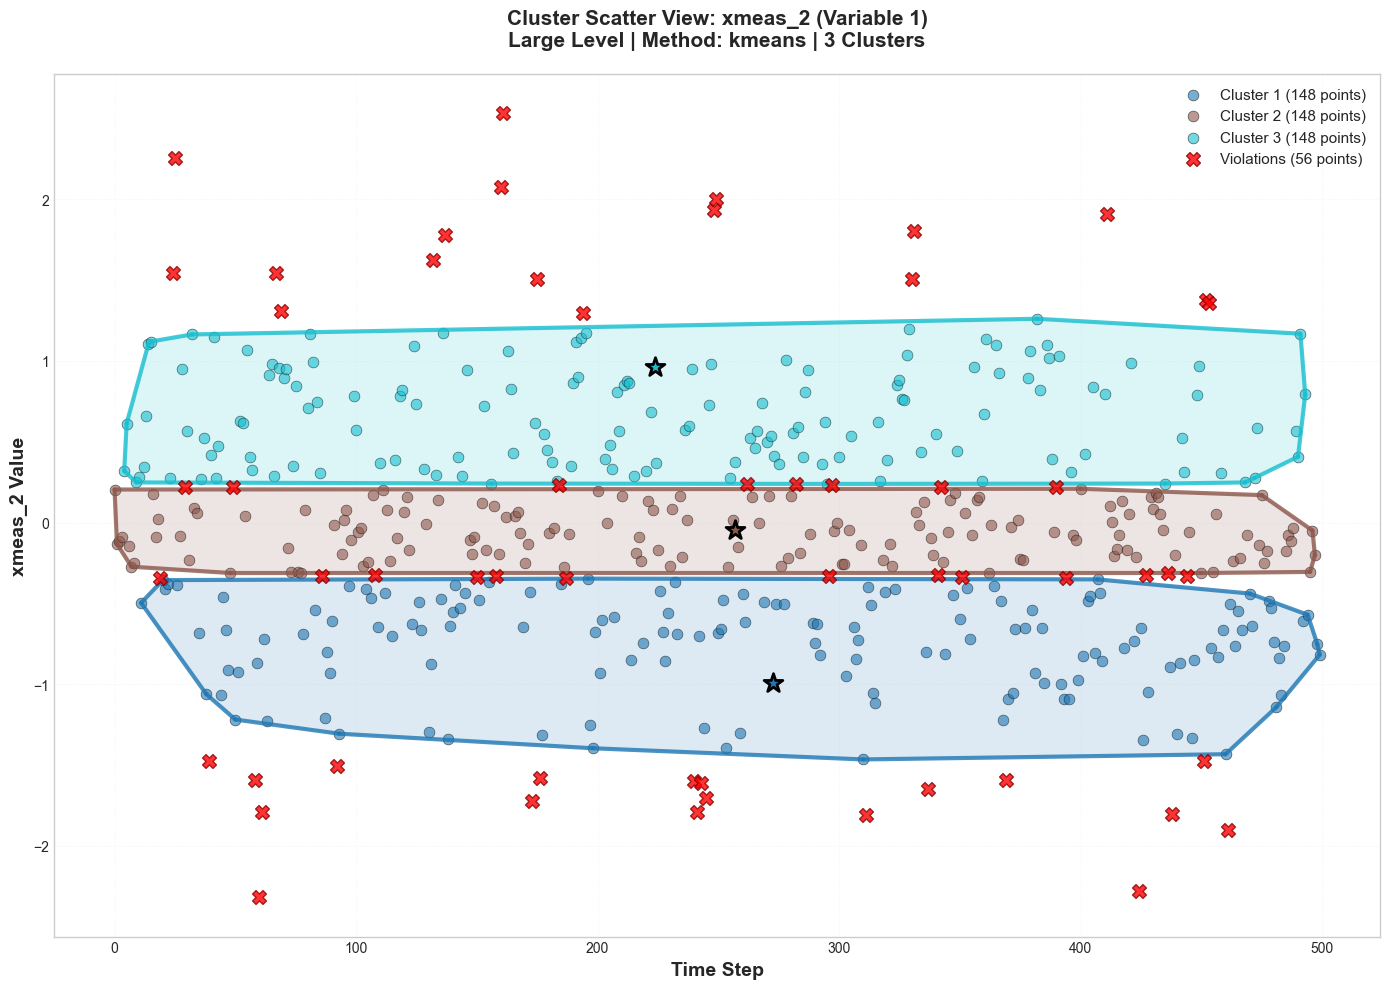


CLUSTER ANALYSIS SUMMARY: xmeas_2
Sensitivity Level: Large
Clustering Method: kmeans
Total Data Points: 500

Cluster Breakdown:

  Cluster 1:
    Center: -0.9905
    Range: [-1.4737, -0.3450]
    Width: 1.1286
    Points: 148 (29.6%)

  Cluster 2:
    Center: -0.0474
    Range: [-0.3139, 0.2158]
    Width: 0.5297
    Points: 148 (29.6%)

  Cluster 3:
    Center: 0.9643
    Range: [0.2372, 1.2863]
    Width: 1.0491
    Points: 148 (29.6%)

  Violations (outside all boundaries):
    Points: 56 (11.2%)



In [25]:
#  - ⭐ Star markers showing cluster centers
visualizer.plot_cluster_scatter_view(
    var_idx=1,  
     level='Large',   # Or 'Medium', 'Large'
      method='kmeans',     # Or 'histogram_peaks', 
      data_source='Train',
      max_samples=40000000
  )

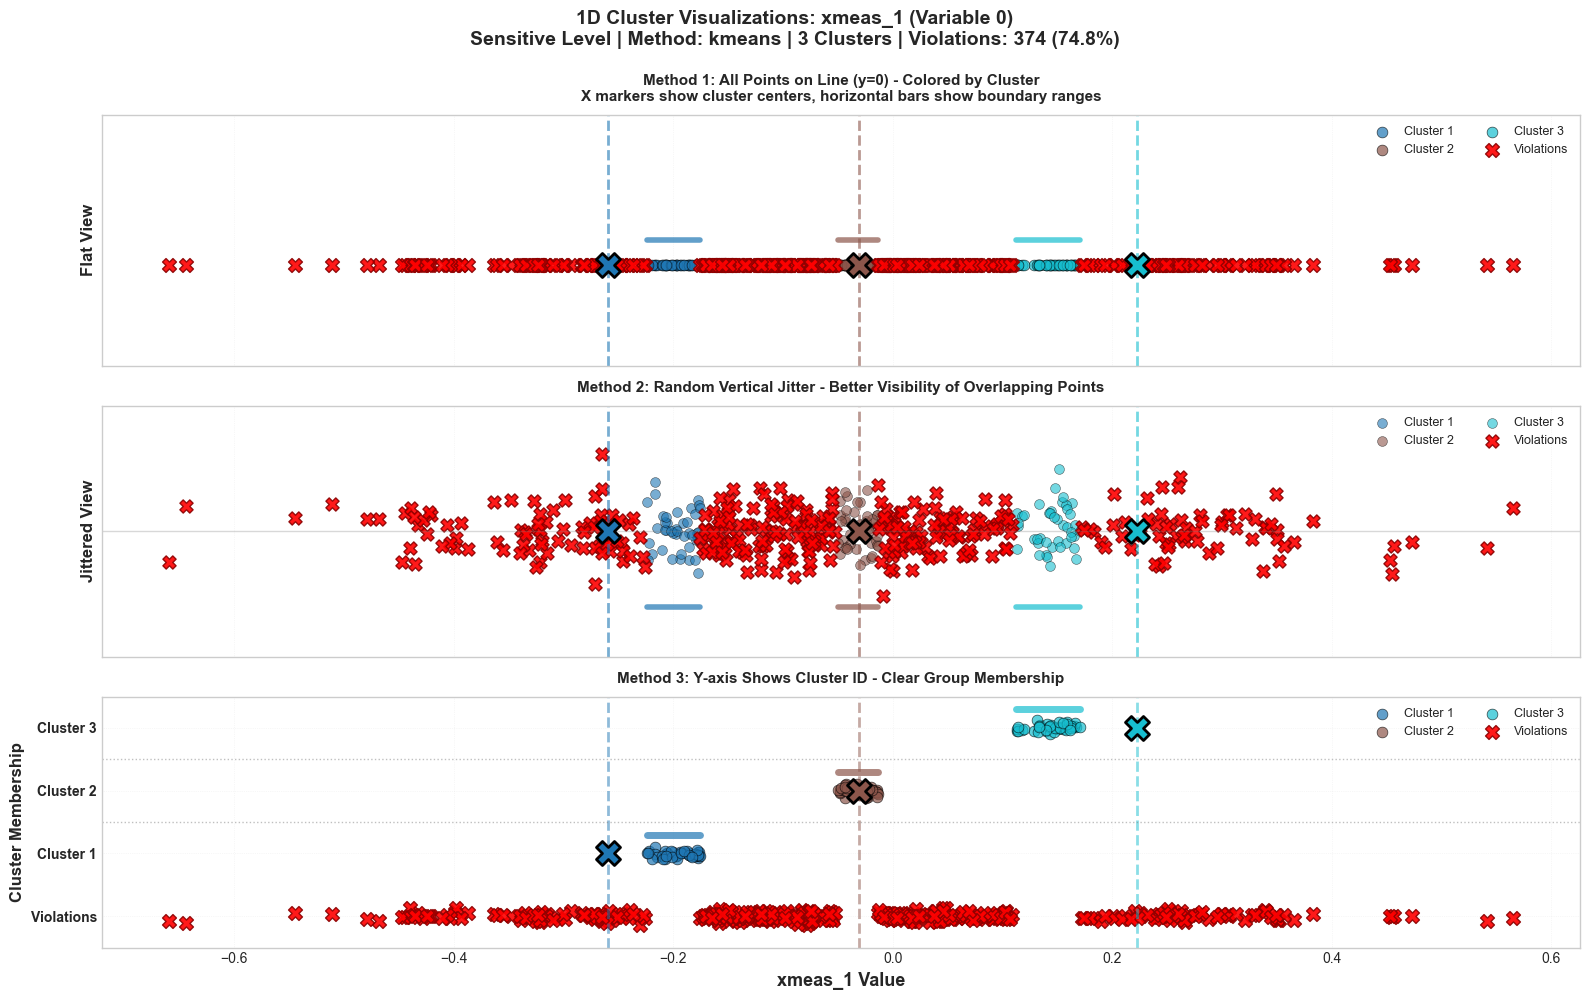


1D CLUSTER VISUALIZATION SUMMARY
Variable: xmeas_1 (Index 0)
Level: Sensitive | Method: kmeans
Data source: Train | Samples: 500

Cluster Centers and Boundaries:
  Cluster 1:
    Center: -0.2596
    Range: [-0.2238, -0.1759]
    Points: 42 (8.4%)
  Cluster 2:
    Center: -0.0307
    Range: [-0.0499, -0.0136]
    Points: 42 (8.4%)
  Cluster 3:
    Center: 0.2228
    Range: [0.1124, 0.1706]
    Points: 42 (8.4%)

  Violations: 374 (74.8%)



In [26]:
visualizer.plot_cluster_1d_view(
      var_idx=0,
      level='Sensitive',
      method='kmeans',
      data_source='Train',
      max_samples=50000
  )

### NEW: Clustering Visualization with Boundary Circles

Visualize data clusters and boundaries with circles/ellipses showing the boundary regions.
This helps understand:
- Where data naturally clusters
- How boundaries capture different operating regimes
- Which clustering method works best for each variable

In [ ]:
from matplotlib.patches import Rectangle, Circle
from matplotlib.collections import PatchCollection

class ClusteringVisualizer:
    """
    Visualize data clustering and boundaries with circles/rectangles around boundary regions.
    
    Supports multiple clustering methods for comparison.
    """
    
    def __init__(self, boundary_calc: QuantileBoundaryCalculator,
                 train_data: np.ndarray, test_data: np.ndarray = None):
        self.boundary_calc = boundary_calc
        self.config = boundary_calc.config
        self.train_data = train_data
        self.test_data = test_data
    
    def plot_clustering_with_boundaries(self, var_idx: int, level: str = 'Sensitive',
                                       method: str = None, data_source: str = 'Train',
                                       max_samples: int = 500):
        """
        Plot scatter plot with boundary circles showing clustering.
        
        Args:
            var_idx: Variable index
            level: Sensitivity level
            method: Clustering method ('kmeans', 'histogram_peaks', 'quantile_positions', or None for current)
            data_source: 'Train', 'Test', or 'Both'
            max_samples: Maximum samples to plot
        """
        var_name = self.config.variable_names[var_idx]
        
        # Get data
        if data_source == 'Train':
            plot_data = self.train_data[:max_samples, var_idx]
            data_label = 'Training'
            data_color = 'steelblue'
        elif data_source == 'Test':
            plot_data = self.test_data[:max_samples, var_idx]
            data_label = 'Test'
            data_color = 'coral'
        else:  # Both
            train_sub = self.train_data[:max_samples, var_idx]
            test_sub = self.test_data[:max_samples, var_idx] if self.test_data is not None else np.array([])
            plot_data = np.concatenate([train_sub, test_sub]) if len(test_sub) > 0 else train_sub
            data_label = 'Combined'
            data_color = 'steelblue'
        
        # Get or calculate boundaries
        if method is None or method == 'Current (from fit)':
            # Use stored boundaries
            boundaries = self.boundary_calc.get_boundaries(var_idx, level)
            method_used = self.boundary_calc.cluster_info[var_idx][level]['method']
        else:
            # Calculate with specified method
            temp_method = self.config.clustering_method
            self.config.clustering_method = method
            
            # Recalculate boundaries with the new method
            if level == 'Sensitive':
                boundaries = self.boundary_calc._calculate_sensitive_boundaries(plot_data, var_idx)
            elif level == 'Medium':
                boundaries = self.boundary_calc._calculate_medium_boundaries(plot_data, var_idx)
            else:
                boundaries = self.boundary_calc._calculate_large_boundaries(plot_data, var_idx)
            
            method_used = method
            self.config.clustering_method = temp_method
        
        # Create figure
        fig, ax = plt.subplots(figsize=(16, 6))
        
        # Create time indices
        time_indices = np.arange(len(plot_data))
        
        # Assign each point to nearest cluster - use INTEGER cluster assignments
        cluster_colors = plt.cm.tab10(np.linspace(0, 1, len(boundaries)))
        cluster_assignments = np.full(len(plot_data), -1, dtype=int)  # -1 = violation
        
        for i, value in enumerate(plot_data):
            # Find which boundary this point belongs to
            for cluster_idx, bound in enumerate(boundaries):
                if bound['lower'] <= value <= bound['upper']:
                    cluster_assignments[i] = cluster_idx
                    break
        
        # Plot points by cluster
        violation_mask = cluster_assignments == -1
        normal_mask = ~violation_mask
        
        # Plot normal points (color by cluster)
        for cluster_idx in range(len(boundaries)):
            cluster_mask = cluster_assignments == cluster_idx
            if np.any(cluster_mask):
                ax.scatter(time_indices[cluster_mask], plot_data[cluster_mask],
                          c=[cluster_colors[cluster_idx]], alpha=0.6, s=20,
                          label=f'Cluster {cluster_idx+1}', edgecolors='black', linewidths=0.3)
        
        # Plot violations - SAME SIZE as normal points, just red color
        if np.any(violation_mask):
            ax.scatter(time_indices[violation_mask], plot_data[violation_mask],
                      c='red', marker='o', s=20, alpha=0.6,
                      label='Violations (Outside ALL boundaries)', edgecolors='black', linewidths=0.3)
        
        # Draw boundary regions as horizontal bands with circles at centers
        for cluster_idx, bound in enumerate(boundaries):
            color = cluster_colors[cluster_idx]
            
            # Draw horizontal band
            ax.axhspan(bound['lower'], bound['upper'], alpha=0.1, color=color)
            
            # Draw boundary lines
            ax.axhline(bound['upper'], color=color, linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axhline(bound['lower'], color=color, linestyle='--', linewidth=1.5, alpha=0.7)
            
            # Draw center line
            ax.axhline(bound['center'], color=color, linestyle='-', linewidth=2, alpha=0.9,
                      label=f'Center {cluster_idx+1} ({bound["center"]:.3f})')
            
            # Add circle marker at representative position
            circle_x = len(plot_data) * (cluster_idx + 1) / (len(boundaries) + 1)
            circle = Circle((circle_x, bound['center']), 
                          radius=bound['width_data_units']/2,
                          fill=False, edgecolor=color, linewidth=2.5, linestyle=':')
            ax.add_patch(circle)
        
        # Labels and title
        ax.set_xlabel('Time Step', fontsize=12, fontweight='bold')
        ax.set_ylabel('Value', fontsize=12, fontweight='bold')
        ax.set_title(f'Clustering View: {var_name} (Variable {var_idx}) - {level} Level\n' +
                    f'Method: {method_used}, {len(boundaries)} Boundaries, Violations: {np.sum(violation_mask)}',
                    fontsize=13, fontweight='bold')
        ax.legend(loc='upper right', fontsize=8, ncol=2)
        ax.grid(alpha=0.3, linestyle=':', linewidth=0.5)
        
        plt.tight_layout()
        plt.show()
    
    def plot_clustering_comparison(self, var_idx: int, level: str = 'Sensitive',
                                   data_source: str = 'Train', max_samples: int = 500):
        """
        Compare all three clustering methods side-by-side for a variable.
        
        Args:
            var_idx: Variable index
            level: Sensitivity level
            data_source: 'Train' or 'Test'
            max_samples: Maximum samples to plot
        """
        var_name = self.config.variable_names[var_idx]
        
        # Get data
        if data_source == 'Train':
            plot_data = self.train_data[:max_samples, var_idx]
        else:
            plot_data = self.test_data[:max_samples, var_idx]
        
        methods = ['kmeans', 'histogram_peaks', 'quantile_positions']
        method_labels = ['K-Means', 'Histogram Peaks', 'Quantile Positions']
        
        fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)
        
        for ax_idx, (method, method_label) in enumerate(zip(methods, method_labels)):
            ax = axes[ax_idx]
            
            # Calculate boundaries with this method
            temp_method = self.config.clustering_method
            self.config.clustering_method = method
            
            n_boundaries = self.config.get_n_boundaries(level)
            centers = self.boundary_calc._find_cluster_centers(plot_data, n_boundaries, method)
            
            # Get boundaries (reuse calculation from boundary calculator)
            if level == 'Sensitive':
                boundaries = self.boundary_calc._calculate_sensitive_boundaries(plot_data, var_idx)
            elif level == 'Medium':
                boundaries = self.boundary_calc._calculate_medium_boundaries(plot_data, var_idx)
            else:
                boundaries = self.boundary_calc._calculate_large_boundaries(plot_data, var_idx)
            
            self.config.clustering_method = temp_method
            
            # Create time indices
            time_indices = np.arange(len(plot_data))
            
            # Assign cluster IDs
            cluster_colors = plt.cm.tab10(np.linspace(0, 1, len(boundaries)))
            cluster_assignments = np.full(len(plot_data), -1, dtype=int)
            
            for i, value in enumerate(plot_data):
                for cluster_idx, bound in enumerate(boundaries):
                    if bound['lower'] <= value <= bound['upper']:
                        cluster_assignments[i] = cluster_idx
                        break
            
            # Plot points by cluster
            for cluster_idx in range(len(boundaries)):
                cluster_mask = cluster_assignments == cluster_idx
                if np.any(cluster_mask):
                    ax.scatter(time_indices[cluster_mask], plot_data[cluster_mask],
                              c=[cluster_colors[cluster_idx]], alpha=0.5, s=15, edgecolors='none')
            
            # Plot violations
            violation_mask = cluster_assignments == -1
            if np.any(violation_mask):
                ax.scatter(time_indices[violation_mask], plot_data[violation_mask],
                          c='red', marker='x', s=30, alpha=0.7)
            
            violations = np.sum(violation_mask)
            
            # Draw boundaries
            for cluster_idx, bound in enumerate(boundaries):
                color = cluster_colors[cluster_idx]
                ax.axhspan(bound['lower'], bound['upper'], alpha=0.08, color=color)
                ax.axhline(bound['center'], color=color, linestyle='-', linewidth=1.5, alpha=0.7)
            
            ax.set_ylabel('Value', fontsize=11, fontweight='bold')
            ax.set_title(f'{method_label} - {len(boundaries)} clusters, {violations} violations ({violations/len(plot_data)*100:.1f}%)',
                        fontsize=12, fontweight='bold')
            ax.grid(alpha=0.3, linestyle=':', linewidth=0.5)
        
        axes[-1].set_xlabel('Time Step', fontsize=12, fontweight='bold')
        fig.suptitle(f'Clustering Method Comparison: {var_name} (Variable {var_idx}) - {level} Level',
                    fontsize=14, fontweight='bold', y=0.995)
        
        plt.tight_layout()
        plt.show()
    
    def create_interactive_clustering_viewer(self):
        """Create interactive widget for clustering visualization"""
        
        def update_plot(var_idx, level, plot_type, method, data_source, max_samples):
            if plot_type == 'Single Method':
                self.plot_clustering_with_boundaries(var_idx, level, method, data_source, max_samples)
            else:  # Comparison
                self.plot_clustering_comparison(var_idx, level, data_source, max_samples)
        
        # Create widgets
        var_selector = widgets.Dropdown(
            options=[(f"{i}: {name}", i) for i, name in enumerate(self.config.variable_names)],
            value=0,
            description='Variable:',
            style={'description_width': 'initial'}
        )
        
        level_selector = widgets.Dropdown(
            options=['Sensitive', 'Medium', 'Large'],
            value='Sensitive',
            description='Level:',
            style={'description_width': 'initial'}
        )
        
        plot_type_selector = widgets.Dropdown(
            options=['Single Method', 'Compare All Methods'],
            value='Single Method',
            description='Plot Type:',
            style={'description_width': 'initial'}
        )
        
        method_selector = widgets.Dropdown(
            options=['Current (from fit)', 'kmeans', 'histogram_peaks', 'quantile_positions'],
            value='Current (from fit)',
            description='Method:',
            style={'description_width': 'initial'}
        )
        
        data_source_selector = widgets.Dropdown(
            options=['Train', 'Test', 'Both'],
            value='Train',
            description='Data Source:',
            style={'description_width': 'initial'}
        )
        
        samples_slider = widgets.IntSlider(
            value=500,
            min=100,
            max=1000,
            step=50,
            description='Max Samples:',
            style={'description_width': 'initial'}
        )
        
        # Create interactive plot
        interact(update_plot,
                var_idx=var_selector,
                level=level_selector,
                plot_type=plot_type_selector,
                method=method_selector,
                data_source=data_source_selector,
                max_samples=samples_slider)


# Initialize clustering visualizer
clustering_viz = ClusteringVisualizer(boundary_calc, X_INCONTROL_TRAIN, X_OUT_OF_CONTROL_TEST)

print("Clustering visualizer initialized.")
print("This visualizer shows:")
print("  - Data points colored by which boundary cluster they belong to")
print("  - Red circles for violations (outside ALL boundaries)")
print("  - Horizontal bands and circles showing boundary regions")
print("  - Method comparison to see which clustering works best")

Clustering visualizer initialized.
This visualizer shows:
  - Data points colored by which boundary cluster they belong to
  - Red circles for violations (outside ALL boundaries)
  - Horizontal bands and circles showing boundary regions
  - Method comparison to see which clustering works best


In [28]:
"""
VISUALIZATION 2: Clustering View with Boundary Circles

This visualizer shows HOW data naturally clusters and how boundaries capture these clusters:

WHAT IT SHOWS:
- Scatter plot of time vs. value colored by cluster membership
  * Each point is colored according to which boundary cluster it belongs to
  * Red 'X' markers indicate violations (points outside ALL boundaries)
  * Horizontal colored bands show the boundary regions
  * Dashed circles visually represent boundary widths around cluster centers
  
- Single Method view: Shows clustering with one chosen method
- Compare All Methods: Shows K-means vs. Histogram Peaks vs. Quantile Positions side-by-side
  
HOW TO INTERPRET:
- Well-clustered data: Points tightly grouped by color
- Violations (red X): Points far from ALL normal clusters
- Circle sizes: Represent boundary widths (larger = more permissive)
- Method comparison: See which clustering method captures your data best
  * K-means: Best for natural, distinct clusters
  * Histogram Peaks: Best for multimodal distributions with clear modes
  * Quantile Positions: Uniform spacing, always works
  
USE CASE:
- Understand WHY certain points are flagged as violations
- Validate that boundaries capture the true operating regimes
- Choose optimal clustering method for each variable
- Visualize multimodal behavior (e.g., valve with 3 positions)
  
CONTROLS:
- Variable: Select which variable to examine
- Level: Sensitivity level (affects boundary widths)
- Plot Type: Single method or compare all three
- Method: Choose clustering algorithm (if Single Method selected)
- Data Source: Train, Test, or Both
"""

# Launch interactive clustering viewer
clustering_viz.create_interactive_clustering_viewer()

print("\nTIP: Start with 'Compare All Methods' to see which clustering works best for your variable")
print("Then use 'Single Method' with your chosen method for detailed analysis")

interactive(children=(Dropdown(description='Variable:', options=(('0: xmeas_1', 0), ('1: xmeas_2', 1), ('2: xm…


TIP: Start with 'Compare All Methods' to see which clustering works best for your variable
Then use 'Single Method' with your chosen method for detailed analysis


## Phase 2: Detect Boundary Violations

Detect when variables exceed boundaries with ternary output:
- **-1**: Below lower boundary
- **0**: Within boundaries (normal)
- **+1**: Above upper boundary

In [34]:

# Initialize detector
violation_detector = ViolationDetector(boundary_calc)

# Detect violations in test data (ternary mode)
print("Detecting violations in OUT-OF-CONTROL test data...")
print("Note: Violation = datapoint is OUTSIDE ALL N boundaries")
test_violations_ternary = violation_detector.detect_all_levels(X_OUT_OF_CONTROL_TEST, mode='ternary')
violation_detector.summary(X_OUT_OF_CONTROL_TEST, mode='ternary')

# Also detect in in-control test data for comparison
print("\n" + "="*80)
print("Detecting violations in IN-CONTROL test data (for comparison)...")
incontrol_violations = ViolationDetector(boundary_calc)
incontrol_test_violations = incontrol_violations.detect_all_levels(X_INCONTROL_TEST, mode='ternary')
incontrol_violations.summary(X_INCONTROL_TEST, mode='ternary')

Detecting violations in OUT-OF-CONTROL test data...
Note: Violation = datapoint is OUTSIDE ALL N boundaries

Violation Summary (ternary mode) for 960 samples, 52 variables:
Violation logic: Outside ALL N boundaries

Sensitive Level (3 boundaries per variable):
  Below all boundaries: 19534 (39.13%)
  Above all boundaries: 22008 (44.09%)
  Total violations: 41542 (83.22%)
  Variables with violations: 52/52
  Avg violations per variable: 798.9

Medium Level (3 boundaries per variable):
  Below all boundaries: 17357 (34.77%)
  Above all boundaries: 19573 (39.21%)
  Total violations: 36930 (73.98%)
  Variables with violations: 52/52
  Avg violations per variable: 710.2

Large Level (3 boundaries per variable):
  Below all boundaries: 9729 (19.49%)
  Above all boundaries: 11159 (22.35%)
  Total violations: 20888 (41.84%)
  Variables with violations: 52/52
  Avg violations per variable: 401.7

Detecting violations in IN-CONTROL test data (for comparison)...

Violation Summary (ternary mode) 

### Interactive Excursion Timeline Visualization

Visualize boundary violations over time with multi-variable selection and level filtering.

In [35]:
# Initialize excursion visualizer
excursion_viz = ExcursionVisualizer(violation_detector, X_OUT_OF_CONTROL_TEST)

print("Excursion visualizer initialized.")
print("Use the interactive viewer below to explore violations.")
print("NOTE: Violations only occur when datapoint is OUTSIDE ALL N boundaries.")

Excursion visualizer initialized.
Use the interactive viewer below to explore violations.
NOTE: Violations only occur when datapoint is OUTSIDE ALL N boundaries.


In [36]:
# Launch interactive excursion viewer
excursion_viz.create_interactive_excursion_viewer()

print("\nTIP: Use Timeline view to understand individual variable behavior")
print("     Use Heatmap view to identify patterns across many variables")

interactive(children=(Text(value='0,1,2,3,4', description='Variables:', placeholder='Enter indices: 0,1,2 or 0…


TIP: Use Timeline view to understand individual variable behavior
     Use Heatmap view to identify patterns across many variables
